# 08 - Strategy Comparison: Comparative Analysis

Compare multiple strategies under various metrics. Visualize their PnL, drawdown, and risk-adjusted statistics.

Objectives:
- Run several strategies side-by-side
- Compare their equity curves and Sharpe ratios
- See how parameter choices affect outperformance
- Application examples from real-world research


## Component Diagram
Strategies feed into a comparative analytics engine that outputs charts, stats, and rankings.


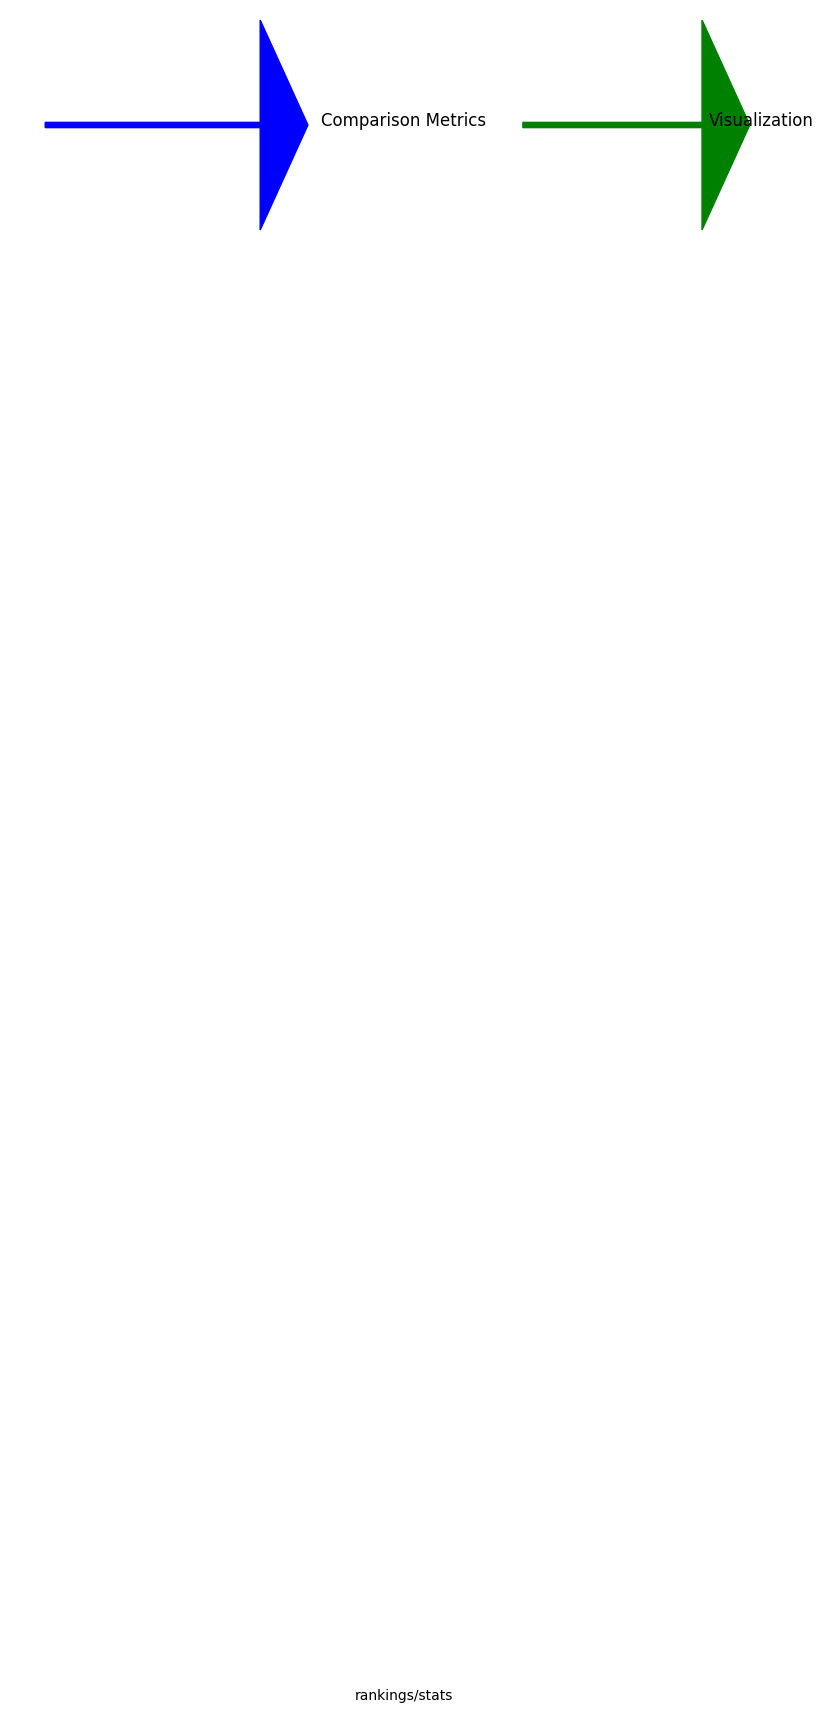

In [1]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 3)); ax.axis('off');
ax.annotate('Strategies', (0.2, 0.5), fontsize=12, ha='center'); ax.annotate('Comparison Metrics', (0.6, 0.5), fontsize=12, ha='center'); ax.annotate('Visualization', (0.9, 0.5), fontsize=12, ha='center'); ax.arrow(0.3,0.5,0.18,0,head_width=0.04, head_length=0.04, color='blue'); ax.arrow(0.7,0.5,0.15,0,head_width=0.04, head_length=0.04, color='green'); ax.text(0.6,0.2,'rankings/stats',ha='center'); plt.show()

## Code Examples: Comparative Analysis

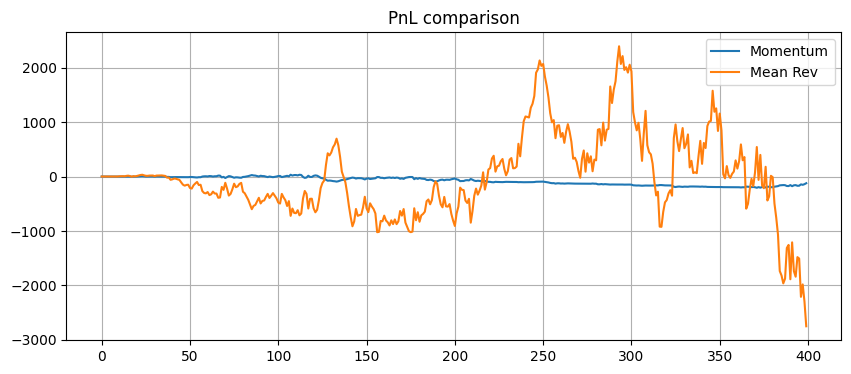

In [2]:
import numpy as np
np.random.seed(5)
prices = 100 + np.cumsum(np.random.normal(0, 1, 400))

def run_strat_sig(prices, signals):
    pnl = np.zeros_like(prices)
    pos = 0
    for t in range(1, len(prices)):
        pos += signals[t-1]
        pnl[t] = pnl[t-1] + pos * (prices[t] - prices[t-1])
    return pnl

def simple_momentum(prices, lookback=10):
    sig = np.zeros(len(prices)); sig[lookback:]=(prices[lookback:]>prices[:-lookback]).astype(int)-0.5; return sig

def meanrev(prices, lookback=10):
    sig = np.zeros(len(prices)); sig[lookback:]=-(prices[lookback:]>prices[:-lookback]).astype(int)-0.5; return sig

pnl_mom = run_strat_sig(prices, simple_momentum(prices,12))
pnl_rev = run_strat_sig(prices, meanrev(prices,8))
plt.figure(figsize=(10,4)); plt.plot(pnl_mom, label='Momentum'); plt.plot(pnl_rev, label='Mean Rev'); plt.legend(); plt.title('PnL comparison'); plt.grid(); plt.show()

## Interactive Sharpe/Drawdown Analyzer
Adjust lookback/parameters to see how stats shift.

In [3]:
try:
    import ipywidgets as widgets
    from ipywidgets import interact
    widgets_ok = True
except: widgets_ok = False

def metrics(pnl):
    r = np.diff(pnl)
    sharpe = np.mean(r)/np.std(r) if np.std(r) else 0
    dd = np.max(np.maximum.accumulate(pnl) - pnl)
    return sharpe, dd

def compare_interactive(mom_lb=10, rev_lb=10):
    sig1 = simple_momentum(prices, mom_lb)
    sig2 = meanrev(prices, rev_lb)
    pnl1 = run_strat_sig(prices, sig1)
    pnl2 = run_strat_sig(prices, sig2)
    plt.figure(figsize=(10,4)); plt.plot(pnl1, label=f'Momentum (lb={mom_lb})'); plt.plot(pnl2, label=f'MeanRev (lb={rev_lb})'); plt.legend(); plt.title('PnL comparison'); plt.grid(); plt.show()
    s1,d1=metrics(pnl1); s2,d2=metrics(pnl2)
    print(f'Momentum Sharpe: {s1:.2f}, MaxDD: {d1:.2f}')
    print(f'MeanRev Sharpe: {s2:.2f}, MaxDD: {d2:.2f}')

if widgets_ok:
    interact(compare_interactive, mom_lb=(2,40,1), rev_lb=(2,40,1))
else:
    compare_interactive()

interactive(children=(IntSlider(value=10, description='mom_lb', max=40, min=2), IntSlider(value=10, descriptio…

## Exercises
1. Add a volatility filter to both strategies
2. Plot a rolling Sharpe ratio
3. Add drawdown-based stop logic

Solutions are toggleable below.

In [4]:
show_solutions = False
try:
    import ipywidgets as widgets
    btn = widgets.ToggleButton(value=False, description='Show Solutions')
    display(btn)
    def on_toggle(change):
        global show_solutions
        show_solutions = change['new']
    btn.observe(on_toggle, 'value')
except:pass
if show_solutions:
    print('1. Only take signal if recent std of returns below vol_threshold')
    print('2. Calculate windowed mean/std of returns and plot over time')
    print('3. If equity drops > x%, set signals[t:]=0 until recovery')

ToggleButton(value=False, description='Show Solutions')

## Performance Benchmarks
Fastest way to compute Sharpe/drawdown for many parameter sets.

In [5]:
import time
N = 10000
start = time.time()
for _ in range(N):
    metrics(pnl_mom)
print(f'{N} Sharpe+MaxDD calcs: {time.time()-start:.2f}s')

10000 Sharpe+MaxDD calcs: 0.28s


## Real-world Applications
- Portfolio strategy selection
- Smart beta index composition
- Rapid prototyping/validation of alphas
